<a href="https://colab.research.google.com/github/EladAriel/Tensorflow/blob/main/Mechanical_Properties_of_Low_Alloy_Steels_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mechanical Properties of Low Alloy Steels - Analysis and Modelling**
The purpose of this analysis is to predict the mechanical properties using the alloy composition and temperature.

Source:
https://www.kaggle.com/datasets/rohannemade/mechanical-properties-of-low-alloy-steels

---
## *Feature Desctiprion*
1. **Alloy Code**: LaD, CCA, CCB, MBB and MBC
2. **Materials**: C (Carbon), Si (Silcon), Mn (Manganese), P (Phosphorus), S (Sulfur), Ni (nickel),Cr (Chromium), Mo (Molybdenum), Cu (Copper), V (Vanadium), Al (Aluminum), N (Nitrogen), Ceq (Carbon Equivalent), Nb + Ta (Niobium + Tantalum)
3. **Mechanical Properties**: Temperature (${°C}$), 0.2% Proof Stress (MPa), Tensile Strength (MPa), Elongation (%), Reduction in Area (%)



---
## *Libraries*

In [80]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
import tensorflow as tf

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode
import plotly.figure_factory as ff

# Data Pre-Processing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Evaluation & CV Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
## *Importing the Dataset*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MatNavi Mechanical properties of low-alloy steels.csv to MatNavi Mechanical properties of low-alloy steels (3).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MatNavi Mechanical properties of low-alloy steels.csv']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [5]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


---
## *Visualizations*

### **Features Distribution**

In [6]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [7]:
# Distribution Graph: Material with Respect of Temperature (°C) 
def temphist(df,material): 
  fig = px.histogram(
      df,
      x=df[material],
      color=df[' Temperature (°C)'],
      template='plotly_white',
      nbins=75,
      color_discrete_sequence=px.colors.sequential.Magenta,
      histfunc='count'
      )

  fig.update_layout(
      font_family='monosapce',
      title=dict(text='{} Distribution with Respect to Temperature (°C)'.format(material),
                  x=0.25,
                  font=dict(size=20))
  )
  fig.show()

In [8]:
# Distribution Graph: Material with Respect of Elongation (%) 
def elonghist(df,material): 
  fig = px.histogram(
      df,
      x=df[material],
      color=df[' Elongation (%)'],
      template='plotly_white',
      nbins=75,
      color_discrete_sequence=px.colors.sequential.Darkmint,
      histfunc='count'
      )

  fig.update_layout(
      font_family='monosapce',
      title=dict(text='{} Distribution with Respect to Elongation (%)'.format(material),
                 x=0.25,
                 font=dict(size=20))
  )

  fig.show()

#### Carbon Distribution

In [9]:
temphist(df,' C')

In [10]:
elonghist(df,' C')

#### Silicon Distribution

In [11]:
temphist(df,' Si')

In [12]:
elonghist(df,' Si')

#### Manganese Distribution

In [13]:
temphist(df,' Mn')

In [14]:
elonghist(df,' Mn')

#### Phosphorus Distribution

In [15]:
temphist(df,' P')

In [16]:
elonghist(df,' P')

#### Sulfur Distribution 

In [17]:
temphist(df,' S')

In [18]:
elonghist(df,' S')

#### Nickel Distribution

In [19]:
temphist(df,' Ni')

In [20]:
elonghist(df,' Ni')

#### Chromium Distribution

In [21]:
temphist(df,' Cr')

In [22]:
elonghist(df,' Cr')

#### Molybdenum Distribution

In [23]:
temphist(df,' Mo')

In [24]:
elonghist(df,' Mo')

#### Copper Distribution

In [25]:
temphist(df,' Cu')

In [26]:
elonghist(df,' Cu')

#### Vanadium Distribution

In [27]:
temphist(df,'V')

In [28]:
elonghist(df,'V')

#### Aluminum Distribution

In [29]:
temphist(df,' Al')

In [30]:
elonghist(df,' Al')

#### Nitrogen Distribution

In [31]:

temphist(df,' N')

In [32]:
elonghist(df,' N')

#### Carbon Equivalent Distribution

In [33]:
temphist(df,'Ceq')

In [34]:
elonghist(df,'Ceq')

#### Niobium + Tantalum Distribution

In [35]:
temphist(df,'Nb + Ta')

In [36]:
elonghist(df,'Nb + Ta')

### Correlation

In [37]:
# Find the correlation matrix
corr = df.drop('Alloy code', axis=1).corr()
corr

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
C,1.000000,-0.406268,0.031015,0.057410,0.012504,0.285788,0.018243,0.255056,0.370774,0.385099,-0.263321,0.035579,-0.273288,0.131773,-0.025522,0.198420,0.123722,-0.148794,-0.277629
Si,-0.406268,1.000000,0.223586,0.138152,-0.075110,-0.079105,0.117414,-0.027114,-0.104919,0.199058,0.390031,-0.122928,0.371245,-0.155321,0.037010,0.269033,0.066060,-0.124037,0.161944
Mn,0.031015,0.223586,1.000000,0.243866,-0.046163,0.454195,-0.474269,-0.405436,0.104023,0.007679,0.694037,-0.236880,0.736526,0.193360,-0.022865,0.399340,0.115703,-0.123131,0.103369
P,0.057410,0.138152,0.243866,1.000000,0.179914,-0.143954,-0.138566,-0.386247,-0.022641,-0.081315,0.253681,-0.255824,0.200261,0.283206,-0.029672,-0.042454,0.014310,0.127121,0.037407
S,0.012504,-0.075110,-0.046163,0.179914,1.000000,0.066504,0.006354,-0.054794,0.086668,0.048468,0.142494,-0.171404,0.059971,-0.023504,-0.003932,0.021205,0.049277,-0.042973,-0.127908
Ni,0.285788,-0.079105,0.454195,-0.143954,0.066504,1.000000,0.125985,0.332420,0.578134,0.341024,0.163561,0.132059,0.101914,-0.102744,0.035333,0.474990,0.141140,-0.291701,-0.019360
Cr,0.018243,0.117414,-0.474269,-0.138566,0.006354,0.125985,1.000000,0.795223,0.199199,0.631938,-0.395500,0.454140,-0.407968,-0.131404,0.092325,0.254899,0.122122,-0.303170,-0.053949
Mo,0.255056,-0.027114,-0.405436,-0.386247,-0.054794,0.332420,0.795223,1.000000,0.296401,0.722976,-0.484443,0.348385,-0.542066,-0.169583,0.086194,0.361247,0.172995,-0.411885,-0.173894
Cu,0.370774,-0.104919,0.104023,-0.022641,0.086668,0.578134,0.199199,0.296401,1.000000,0.294993,-0.262760,0.201425,-0.201816,-0.185688,0.024749,0.200388,0.066212,-0.178647,-0.179090
V,0.385099,0.199058,0.007679,-0.081315,0.048468,0.341024,0.631938,0.722976,0.294993,1.000000,-0.122061,0.232178,-0.062567,-0.086649,0.066731,0.636588,0.300307,-0.501546,-0.210469


In [38]:
# Create Heatmap to visualize the correlation
heatmap_fig= px.imshow(corr, height=800, width=800, template='plotly_white')

heatmap_fig.update_layout(font_family='monospace',
                          title=dict(text='Correlation Heatmap',
                                     x=0.5,
                                     y=0.93,
                                     font=dict(size=24)))

heatmap_fig.show()

In [39]:
# Create a new DataFrame of mechanical properties
df_mp = df[[' Temperature (°C)',
           ' 0.2% Proof Stress (MPa)',
           ' Tensile Strength (MPa)',
           ' Elongation (%)',
           ' Reduction in Area (%)']]
df_mp

,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,27,342,490,30,71
1,100,338,454,27,72
2,200,337,465,23,69
3,300,346,495,21,70
4,400,316,489,26,79
...,...,...,...,...,...
910,350,268,632,28,65
911,400,244,575,28,68
912,450,224,500,29,72
913,500,209,428,30,78


In [40]:
scatterfig = px.scatter_matrix(df_mp, height=1250, width=1250, template="plotly_white", opacity=0.7)
scatterfig.show()


💡 Correlation Conclusions

As Temperature increases:
1. `'0.2 Proof Stress (MPa)'` decreases slightly.
2. `'Reduction in Area (%)'` increases.
3. `'Tensile Strength (MPa)'` decreases.
4. `'Elongation (%)'` increases.

---
## *Data Preparation*

### Missing Values

In [41]:
df.isna().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

In [42]:
df.duplicated().sum()

0

**Note: There are zero missing values or duplicated values in the dataset**

### Standardizing the Data

In [43]:
def standdata(df,targetname):
  # Spliting the DataFrame into features and target columns
  # features
  X = df.iloc[:,:-4].drop(labels='Alloy code', axis=1)
  
  # target
  y = df[targetname]

  # Spliting the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Standardizing the data
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  return X_train, X_test, y_train, y_test

---
## *Modelling*

### Model to predict `' 0.2% Proof Stress (MPa)'`

#### Scikit-learn

In order to find out the baseline models for the data, a spot checking method is being used

In [120]:
X_train, X_test, y_train, y_test = standdata(df,' 0.2% Proof Stress (MPa)')

In [81]:
def spotcheck(X_train,X_test,y_train, y_test):
  filterwarnings('ignore')
  models =[("LinearR", LinearRegression()),
          ("LR", LogisticRegression(max_iter=1000)),
          ("DTR", DecisionTreeRegressor()),  
          ('RF',RandomForestRegressor()),
          ('KNN', KNeighborsRegressor(n_neighbors=10)), 
          ("SVR", SVR()),
          ("SGDR", SGDRegressor()),
          ("Ridge", RidgeCV()),          
          ('ADA', AdaBoostRegressor()),
          ('XGB',GradientBoostingRegressor()),
          ('PAC',PassiveAggressiveRegressor())]

  results = []
  names = []
  finalResults = []

  for name,model in models:
      model.fit(X_train, y_train)
      model_results = model.predict(X_test)
      r2score = r2_score(y_test, model_results) 
      MSE = mean_squared_error(y_test, model_results)
      MAE = mean_absolute_error(y_test, model_results)
      results.append(r2score)
      results.append(MSE)
      results.append(MAE)
      names.append(name)
      finalResults.append((name, r2score, MSE, MAE))
      
  finalResults.sort(key=lambda k:k[1],reverse=True)
  return finalResults

In [121]:
# Set Random Seed
np.random.seed(42)

# Run spot checking
proofstress_df = pd.DataFrame(spotcheck(X_train,X_test,y_train, y_test), columns=['Model Name', 'R2 Score', 'MSE', 'MAE'])
proofstress_df

,Model Name,R2 Score,MSE,MAE
0,RF,0.940257,935.707335,14.459727
1,XGB,0.937030,986.259160,16.102154
2,DTR,0.868114,2065.639344,22.371585
3,KNN,0.851249,2329.777814,31.822951
4,LinearR,0.823251,2768.292676,36.322981
5,Ridge,0.823190,2769.243539,36.341339
6,SGDR,0.820049,2818.451105,36.654219
7,ADA,0.807286,3018.351483,41.385284
8,PAC,0.768974,3618.394719,43.610437
9,LR,0.715538,4455.327869,46.661202


##### Random Forest Regression

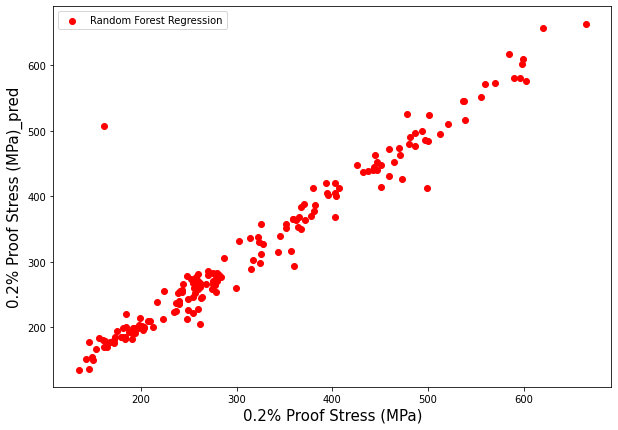

In [85]:
# Fit the model
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# Prediction
y_pred_RF = model_RF.predict(X_test)

# Plot the relation between y_test and y_pred
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_RF, c="r", label="Random Forest Regression")

plt.xlabel("0.2% Proof Stress (MPa)", fontsize=15)
plt.ylabel("0.2% Proof Stress (MPa)_pred", fontsize=15)
plt.legend()

#### TensorFlow

In [127]:
# Build a Neural Network
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a Model
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the Model
nn_model.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mse"])

# 3. Fit the Model
history = nn_model.fit(X_train, y_train, batch_size = 256, shuffle=True, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 5ms/step - loss: 127295.5859 - mse: 127295.5859
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 127148.0312 - mse: 127148.0312
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 127001.4766 - mse: 127001.4766
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 126829.7891 - mse: 126829.7891
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 126650.7969 - mse: 126650.7969
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 126442.9844 - mse: 126442.9844
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 126201.7031 - mse: 126201.7031
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 125916.8672 - mse: 125916.8672
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 125592.6094 - mse: 125592.6094
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 

6/6 [==============================] - 0s 3ms/step - loss: 1117.8348 - mse: 1117.8348


Text(0.5, 0, 'epochs')

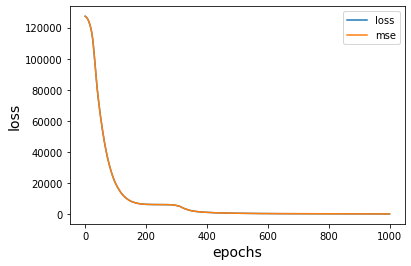

In [128]:
# Evalute the Model
nn_model.evaluate(X_test, y_test)

# Plot loss VS epochs graph
pd.DataFrame(history.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [129]:
# Prediction
y_pred_nn = nn_model.predict(X_test)
r2score_nn_ps = np.round(r2_score(y_test, y_pred_nn),2)
print("R2 score is {}".format(r2score_nn_ps))

R2 score is 0.93


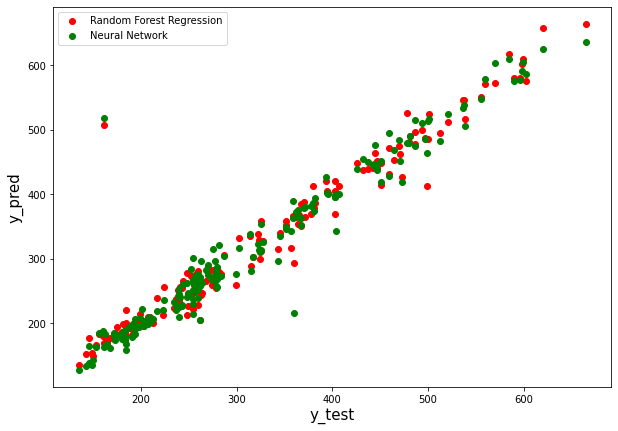

In [89]:
# compare between tensorflow and scikit-learn
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_RF, c="r", label="Random Forest Regression")
plt.scatter(y_test, y_pred_nn, c="g", label="Neural Network")

plt.xlabel("y_test", fontsize=15)
plt.ylabel("y_pred", fontsize=15)
plt.legend()

### Model to predict `' Tensile Strength (MPa)'`

#### Scikit-learn

In [132]:
# Standardizing the data
X_train, X_test, y_train, y_test = standdata(df,' Tensile Strength (MPa)')

In [133]:
# Set Random Seed
np.random.seed(42)

# Run spot checking
tensilestress_df = pd.DataFrame(spotcheck(X_train,X_test,y_train, y_test), columns=['Model Name', 'R2 Score', 'MSE', 'MAE'])
tensilestress_df

,Model Name,R2 Score,MSE,MAE
0,XGB,0.951500,683.147055,19.674629
1,RF,0.933400,938.098846,19.719781
2,DTR,0.872406,1797.224044,26.338798
3,ADA,0.731584,3780.788947,52.253517
4,PAC,0.601830,5608.434207,62.183357
5,LR,0.561349,6178.639344,61.382514
6,SGDR,0.547754,6370.124441,67.110459
7,Ridge,0.536222,6532.560458,67.692744
8,LinearR,0.518739,6778.814908,68.645102
9,SVR,0.224468,10923.782926,80.277135


##### Gradient Boosting Regressor

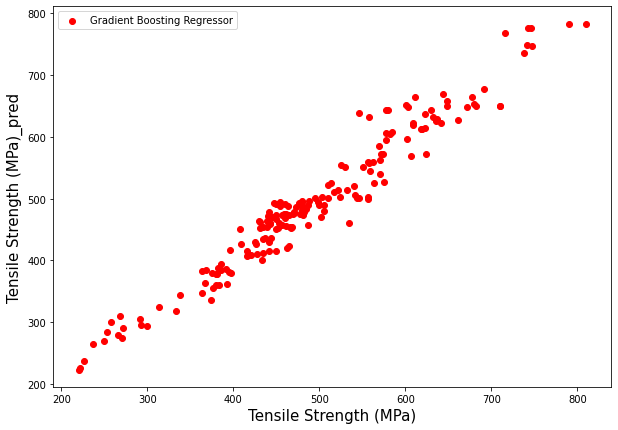

In [95]:
# Fit the model
model_XGB = GradientBoostingRegressor()
model_XGB.fit(X_train, y_train)

# Prediction
y_pred_XGB = model_XGB.predict(X_test)

# Plot the relation between y_test and y_pred
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_XGB, c="r", label="Gradient Boosting Regressor")

plt.xlabel("Tensile Strength (MPa)", fontsize=15)
plt.ylabel("Tensile Strength (MPa)_pred", fontsize=15)
plt.legend()

#### TensorFlow

In [134]:
# Build a Neural Network
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a Model
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the Model
nn_model.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mse"])

# 3. Fit the Model
history = nn_model.fit(X_train, y_train, batch_size = 256, shuffle=True, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 6ms/step - loss: 315593.7812 - mse: 315593.7812
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 315446.5625 - mse: 315446.5625
Epoch 3/1000
3/3 [==============================] - 0s 5ms/step - loss: 315304.9688 - mse: 315304.9688
Epoch 4/1000
3/3 [==============================] - 0s 5ms/step - loss: 315139.1250 - mse: 315139.1250
Epoch 5/1000
3/3 [==============================] - 0s 5ms/step - loss: 314967.9688 - mse: 314967.9688
Epoch 6/1000
3/3 [==============================] - 0s 6ms/step - loss: 314770.9688 - mse: 314770.9688
Epoch 7/1000
3/3 [==============================] - 0s 7ms/step - loss: 314537.8750 - mse: 314537.8750
Epoch 8/1000
3/3 [==============================] - 0s 6ms/step - loss: 314273.0938 - mse: 314273.0938
Epoch 9/1000
3/3 [==============================] - 0s 6ms/step - loss: 313952.0000 - mse: 313952.0000
Epoch 10/1000
3/3 [==============================] - 0s 8ms/step - loss: 

6/6 [==============================] - 1s 16ms/step - loss: 572.5961 - mse: 572.5961


Text(0.5, 0, 'epochs')

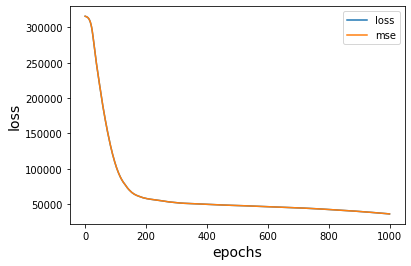

In [135]:
# Evalute the Model
nn_model.evaluate(X_test, y_test)

# Plot loss VS epochs graph
pd.DataFrame(history.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [136]:
# Prediction
y_pred_nn = nn_model.predict(X_test)
r2score_nn_ts = np.round(r2_score(y_test, y_pred_nn),2)
print("R2 score is {}".format(r2score_nn_ts))

R2 score is 0.96


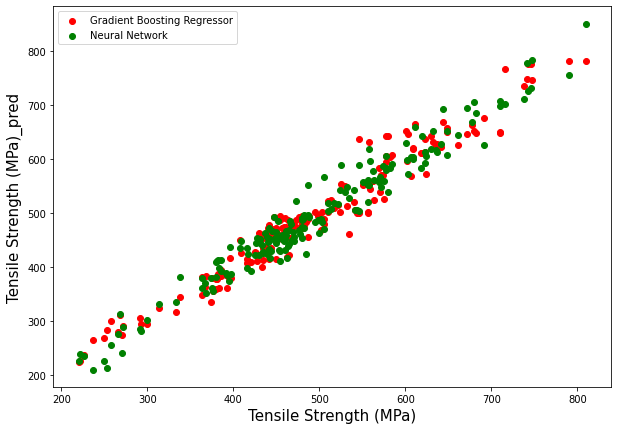

In [100]:
# compare between tensorflow and scikit-learn
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_XGB, c="r", label="Gradient Boosting Regressor")
plt.scatter(y_test, y_pred_nn, c="g", label="Neural Network")

plt.xlabel("Tensile Strength (MPa)", fontsize=15)
plt.ylabel("Tensile Strength (MPa)_pred", fontsize=15)
plt.legend()

### Model to predict `' Elongation (%)'`

#### Scikit-learn

In [169]:
# Standardizing the data
X_train, X_test, y_train, y_test = standdata(df,' Elongation (%)')

In [138]:
# Set Random Seed
np.random.seed(42)

# Run spot checking
elongation_df = pd.DataFrame(spotcheck(X_train,X_test,y_train, y_test), columns=['Model Name', 'R2 Score', 'MSE', 'MAE'])
elongation_df

,Model Name,R2 Score,MSE,MAE
0,RF,0.876159,8.479008,2.068525
1,XGB,0.867425,9.076997,2.155437
2,DTR,0.794404,14.076503,2.546448
3,ADA,0.727283,18.672104,3.403069
4,KNN,0.567444,29.615792,3.833333
5,SVR,0.495991,34.507952,3.825862
6,SGDR,0.428987,39.095490,4.869725
7,Ridge,0.427757,39.179734,4.861532
8,LinearR,0.423809,39.450067,4.883183
9,LR,0.282730,49.109290,4.901639


##### Random Forest Regression

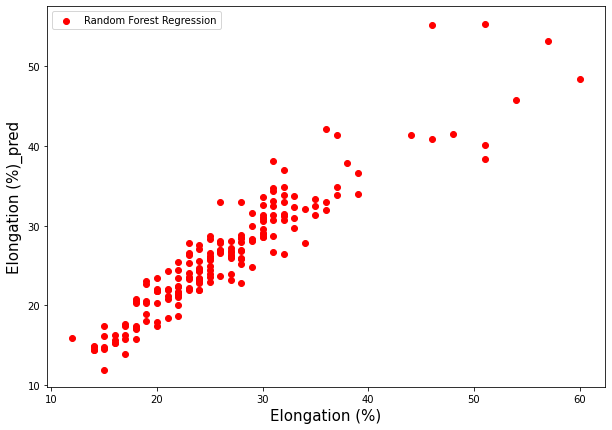

In [170]:
# Fit the model
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# Prediction
y_pred_RF = model_RF.predict(X_test)

# Plot the relation between y_test and y_pred
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_RF, c="r", label="Random Forest Regression")

plt.xlabel("Elongation (%)", fontsize=15)
plt.ylabel("Elongation (%)_pred", fontsize=15)
plt.legend()

#### TensorFlow

In [139]:
# Build a Neural Network
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a Model
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the Model
nn_model.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mse"])

# 3. Fit the Model
history = nn_model.fit(X_train, y_train, batch_size = 256, shuffle=True, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 6ms/step - loss: 795.4435 - mse: 795.4435
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 783.9728 - mse: 783.9728
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 772.1105 - mse: 772.1105
Epoch 4/1000
3/3 [==============================] - 0s 7ms/step - loss: 761.2900 - mse: 761.2900
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 748.0806 - mse: 748.0806
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 733.7228 - mse: 733.7228
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 717.6259 - mse: 717.6259
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 700.3553 - mse: 700.3553
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 681.7216 - mse: 681.7216
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 660.6140 - mse: 660.6140
Epoch 11/1000
3/3 [==========

6/6 [==============================] - 0s 4ms/step - loss: 12.9549 - mse: 12.9549


Text(0.5, 0, 'epochs')

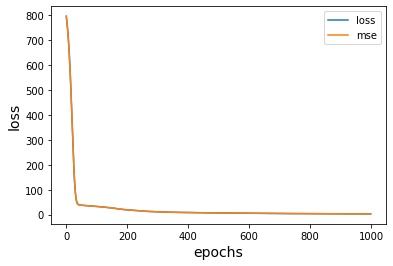

In [140]:
# Evalute the Model
nn_model.evaluate(X_test, y_test)

# Plot loss VS epochs graph
pd.DataFrame(history.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [141]:
# Prediction
y_pred_nn = nn_model.predict(X_test)
r2score_nn_el = np.round(r2_score(y_test, y_pred_nn),2)
print("R2 score is {}".format(r2score_nn_el))

R2 score is 0.81


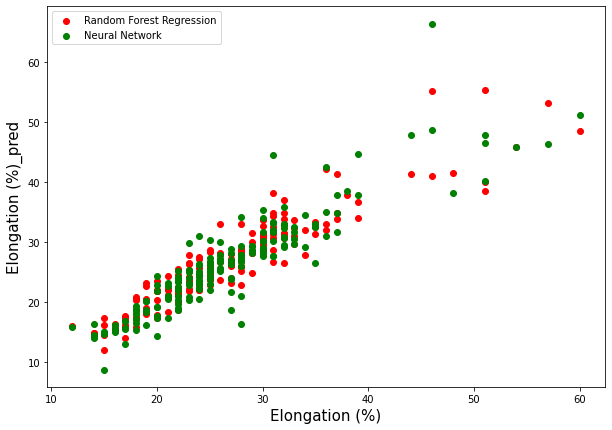

In [107]:
# compare between tensorflow and scikit-learn
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_RF, c="r", label="Random Forest Regression")
plt.scatter(y_test, y_pred_nn, c="g", label="Neural Network")

plt.xlabel("Elongation (%)", fontsize=15)
plt.ylabel("Elongation (%)_pred", fontsize=15)
plt.legend()

### Model to predict `' Reduction in Area (%)'`

#### Scikit-learn

In [142]:
# Standardizing the data
X_train, X_test, y_train, y_test = standdata(df,' Reduction in Area (%)')

In [143]:
# Set Random Seed
np.random.seed(42)

# Run spot checking
area_df = pd.DataFrame(spotcheck(X_train,X_test,y_train, y_test), columns=['Model Name', 'R2 Score', 'MSE', 'MAE'])
area_df

,Model Name,R2 Score,MSE,MAE
0,RF,0.873121,17.694695,2.761803
1,XGB,0.859949,19.531724,3.102895
2,DTR,0.750524,34.792350,3.743169
3,ADA,0.648813,48.977041,5.774726
4,KNN,0.583243,58.121530,5.878689
5,SVR,0.493414,70.649184,6.066504
6,Ridge,0.442234,77.786899,6.813317
7,LinearR,0.438963,78.243109,6.841412
8,SGDR,0.438814,78.263838,6.842450
9,LR,0.429656,79.540984,6.688525


##### Random Forest Regression

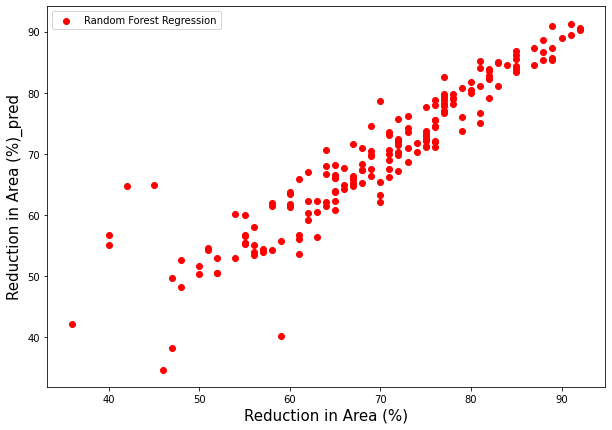

In [113]:
# Fit the model
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# Prediction
y_pred_RF = model_RF.predict(X_test)

# Plot the relation between y_test and y_pred
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_RF, c="r", label="Random Forest Regression")

plt.xlabel("Reduction in Area (%)", fontsize=15)
plt.ylabel("Reduction in Area (%)_pred", fontsize=15)
plt.legend()

#### TensorFlow

In [144]:
# Build a Neural Network
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a Model
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(100, activation = 'tanh'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the Model
nn_model.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mse"])

# 3. Fit the Model
history = nn_model.fit(X_train, y_train, batch_size = 256, shuffle=True, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 5ms/step - loss: 5097.8828 - mse: 5097.8828
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 5076.9214 - mse: 5076.9214
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 5053.7280 - mse: 5053.7280
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 5031.2788 - mse: 5031.2788
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 5003.0981 - mse: 5003.0981
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 4969.9111 - mse: 4969.9111
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 4930.8745 - mse: 4930.8745
Epoch 8/1000
3/3 [==============================] - 0s 5ms/step - loss: 4886.2412 - mse: 4886.2412
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 4835.6304 - mse: 4835.6304
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 4773.5420 - mse: 4773.5420
Epoch 11/

6/6 [==============================] - 0s 3ms/step - loss: 23.8287 - mse: 23.8287


Text(0.5, 0, 'epochs')

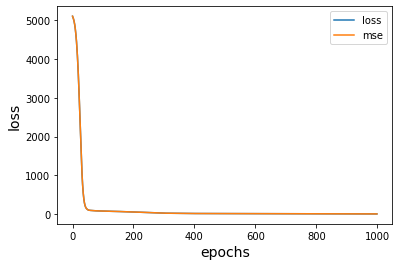

In [145]:
# Evalute the Model
nn_model.evaluate(X_test, y_test)

# Plot loss VS epochs graph
pd.DataFrame(history.history).plot()
plt.ylabel('loss', fontsize=14)
plt.xlabel('epochs', fontsize=14)

In [146]:
# Prediction
y_pred_nn = nn_model.predict(X_test)
r2score_nn_ar = np.round(r2_score(y_test, y_pred_nn),2)
print("R2 score is {}".format(r2score_nn_ar))

R2 score is 0.83


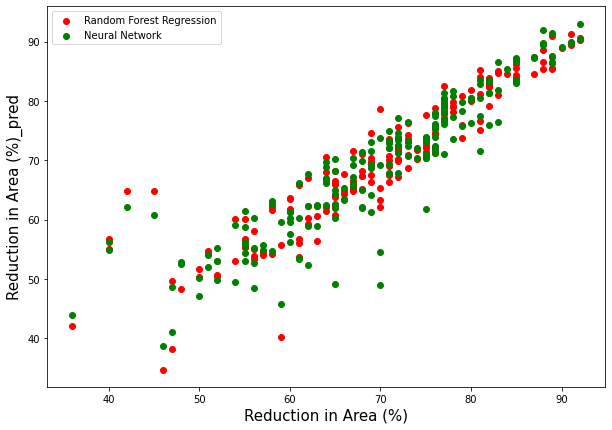

In [118]:
# compare between tensorflow and scikit-learn
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred_RF, c="r", label="Random Forest Regression")
plt.scatter(y_test, y_pred_nn, c="g", label="Neural Network")

plt.xlabel("Reduction in Area (%)", fontsize=15)
plt.ylabel("Reduction in Area (%)_pred", fontsize=15)
plt.legend()

### Comparing Between Scikit-learn and TensorFlow

In [163]:
r2dict = {'R2 Score - TensorFlow':[r2score_nn_ps, r2score_nn_ts, r2score_nn_el, r2score_nn_ar], 'R2 Score - Scikit-learn': [proofstress_df['R2 Score'][0],
          tensilestress_df['R2 Score'][0], elongation_df['R2 Score'][0], area_df['R2 Score'][0]]}
rownames = ['0.2% Proof Strength', 'Tensile Strength', '% Elongation', '% Reduction in Area']
pd.DataFrame(r2dict, index=rownames)

,R2 Score - TensorFlow,R2 Score - Scikit-learn
0.2% Proof Strength,0.93,0.940257
Tensile Strength,0.96,0.951500
% Elongation,0.81,0.876159
% Reduction in Area,0.83,0.873121


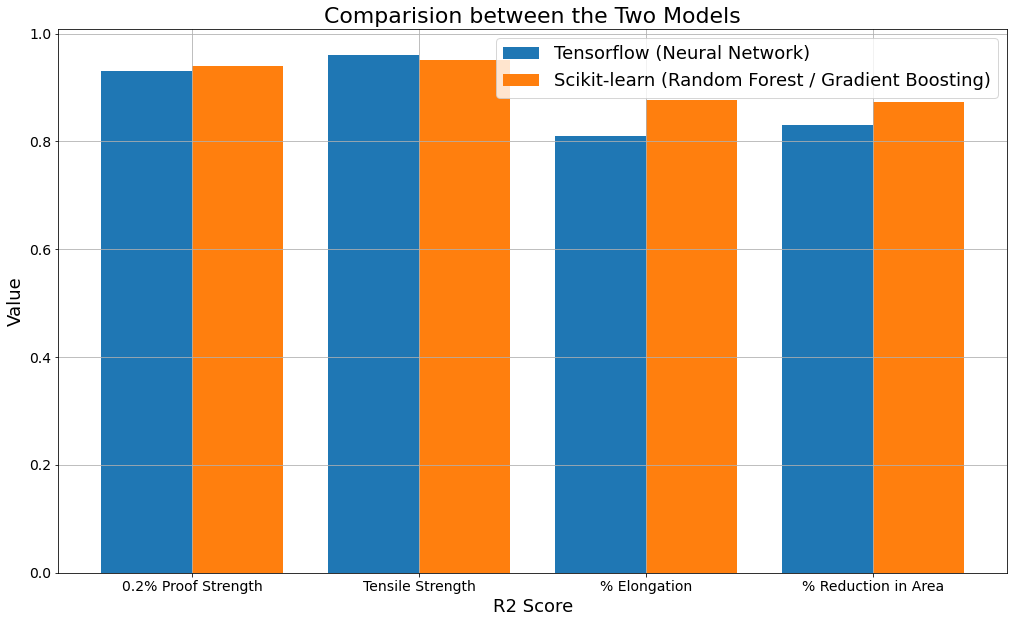

In [152]:
fig= plt.figure(figsize=(17,10))
X = ['0.2% Proof Strength', 'Tensile Strength', '% Elongation', '% Reduction in Area']
nn = [r2score_nn_ps, r2score_nn_ts, r2score_nn_el, r2score_nn_ar]
sl = [proofstress_df['R2 Score'][0], tensilestress_df['R2 Score'][0], elongation_df['R2 Score'][0], area_df['R2 Score'][0]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, nn, 0.4, label = 'Tensorflow (Neural Network)')
plt.bar(X_axis + 0.2, sl, 0.4, label = 'Scikit-learn (Random Forest / Gradient Boosting)')
  
plt.xticks(X_axis, X, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("R2 Score", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Comparision between the Two Models", fontsize=22)
plt.legend(fontsize = 18)
plt.grid()
plt.show()

---
## *Conclusion*

The Scikit-learn regressors (Random Forest or Gradient Boosting) preform better in 3 of 4 categories. 
To predict Elongation (%) and Reduction in Area (%) better use the Scikit-learn regressors and to predict 0.2% Proof Strength (MPa) and Tensile Strength (MPa) you can choose each one of the two models.